<a href="https://colab.research.google.com/github/rohit-01042002/Project01/blob/main/Diabetic_Retino.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2 as cv
import PIL
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import models,layers,Sequential
import numpy as np
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data=os.listdir('/content/drive/MyDrive/Diabetic_R/train/DR')

In [ ]:
filename='/content/drive/MyDrive/Diabetic_R/train/DR'+'/'+data[0]

In [ ]:
filename

'/content/drive/MyDrive/Diabetic_R/train/DR/07083738b75e_png.rf.8d24b8a03bac06ac20d549ad76708c6e.jpg'

In [ ]:
image=plt.imread(filename)

(-0.5, 223.5, 223.5, -0.5)

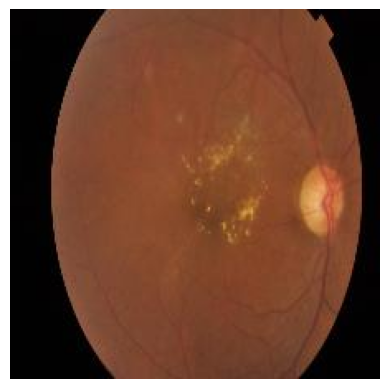

In [ ]:
plt.imshow(image)
plt.axis('off')

In [ ]:
def processor(folder,file):
  filename=folder+'/'+file
  image=cv.imread(filename)
  return image

In [ ]:
folder_name='/content/drive/MyDrive/Diabetic_R/train/DR'
train_image=[]
for name in data:
  train_image.append(processor(folder_name,name))

In [ ]:
data=os.listdir('/content/drive/MyDrive/Diabetic_R/train/No_DR')

In [ ]:
folder_name='/content/drive/MyDrive/Diabetic_R/train/No_DR'
train_image_No=[]
for name in data:
  train_image_No.append(processor(folder_name,name))

In [ ]:
train_images=train_image+train_image_No

In [ ]:
train_images=np.array(train_images)

In [ ]:
x_train=train_images
y1=[float(1) for x in train_image]
y2=[float(0) for x in train_image_No]
y_train=np.array(y1+y2)

In [ ]:
x_train.shape

(2076, 224, 224, 3)

In [ ]:
y_train.shape

(2076,)

In [ ]:
data_test=os.listdir('/content/drive/MyDrive/Diabetic_R/test/DR')

In [ ]:
folder_name='/content/drive/MyDrive/Diabetic_R/test/DR'
test_image=[]
for name in data_test:
  test_image.append(processor(folder_name,name))

In [ ]:
data_test=os.listdir('/content/drive/MyDrive/Diabetic_R/test/No_DR')
folder_name='/content/drive/MyDrive/Diabetic_R/test/No_DR'
test_image_No=[]
for name in data_test:
  test_image_No.append(processor(folder_name,name))

In [ ]:
x_test=test_image+test_image_No
x_test=np.array(x_test)

In [ ]:
y1=[float(1) for x in test_image]
y2=[float(0) for x in test_image_No]
y_test=np.array(y1+y2)

In [ ]:
x_train=x_train/255
x_test=x_test/255

In [ ]:
y_test.shape

(231,)

In [ ]:
model=models.Sequential([
    layers.Conv2D(filters=32,kernel_size=(3,3)),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(filters=64,kernel_size=(3,3)),
    layers.MaxPool2D((2,2)),

    layers.Flatten(),
    layers.Dense(2076,activation='relu'),
    layers.Dense(2076,activation='relu'),
    layers.Dense(1,activation='sigmoid')
])

model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

history=model.fit(x_train,y_train,epochs=5)

Epoch 1/5
65/65 [==============================] - 17s 154ms/step - loss: 3.9871 - accuracy: 0.8015
Epoch 2/5
65/65 [==============================] - 9s 140ms/step - loss: 0.2846 - accuracy: 0.9056
Epoch 3/5
65/65 [==============================] - 9s 140ms/step - loss: 0.2039 - accuracy: 0.9345
Epoch 4/5
65/65 [==============================] - 9s 139ms/step - loss: 0.1783 - accuracy: 0.9408
Epoch 5/5
65/65 [==============================] - 9s 138ms/step - loss: 0.1598 - accuracy: 0.9432


In [ ]:
y_pred=model.predict(x_test)

8/8 [==============================] - 0s 52ms/step


In [ ]:
y_pred=y_pred.reshape(-1,)
y_pred_ans=[]
for x in y_pred:
  if x>=0.5:
    y_pred_ans.append(1)
  else:
    y_pred_ans.append(0)
y_pred_ans=np.array(y_pred_ans)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
cm=confusion_matrix(y_test,y_pred_ans)
print(cm)
report=classification_report(y_test,y_pred_ans)
print(report)

[[116   2]
 [ 13 100]]
              precision    recall  f1-score   support

         0.0       0.90      0.98      0.94       118
         1.0       0.98      0.88      0.93       113

    accuracy                           0.94       231
   macro avg       0.94      0.93      0.93       231
weighted avg       0.94      0.94      0.93       231



(-0.5, 223.5, 223.5, -0.5)

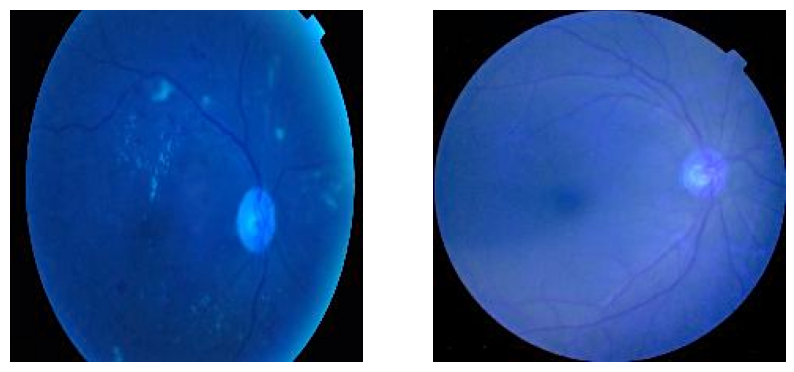

In [ ]:
fig, ax=plt.subplots(1,2,figsize=(10,10))
ax[0].imshow(train_image[189])
ax[0].axis('off')
ax[1].imshow(train_image_No[167])
ax[1].axis('off')